# Problemas de Valor de Frontera (Boundary Value Problems)

En general un problema de valor de frontera de segundo orden posee la siguiente estructura:

$$\begin{align}y'' &= f(t,y,y') \\y(a) &= y_a \\y(b) &= y_b \end{align}$$

donde $y(a)$ e $y(b)$ son las condiciones de borde para el problema que está definido en el intervalo $a \leq t \leq b$. La respuesta a este problema es una función $y(t)$.

In [58]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

([<matplotlib.axis.YTick at 0x7fab1ad9b2b0>,
 <a list of 3 Text yticklabel objects>)

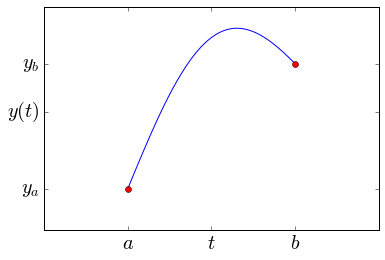

In [65]:
def y(x):
    return np.exp(-x**2)*np.sin(x)
xx = np.linspace(0, 1, 100)
yy = y(xx)
plt.plot(xx,yy)
plt.plot(0,0,'ro')
plt.plot(1,y(1),'ro')
plt.xlim(-0.5, 1.5)
plt.ylim(-0.1, 0.45)
labels = ["$a$", "$t$", "$b$"]
labels2 = ["$y_a$", "$y(t)$", "$y_b$"]
plt.xticks([0, 0.5, 1], labels, fontsize=20)
plt.yticks([0, y(0.2) ,y(1)], labels2, fontsize=20)

Ejemplo: **Encuentre la altura máxima para un proyectil lanzado desde 30 metros de altura y que alcanza el suelo en 4 segundos.**

En este caso, el problema puede plantearse dadas las leyes de Newton de movimiento como:

$\begin{align}
y'' &= -g\\
y(0) &= 30\\
y(4) &= 0
\end{align}
$

Analíticamente lo resolvemos vía integración de $y''$ pues ésta depende únicamente de $t$.

$
\begin{align}
y'(t) &= \int y''(t)\,dt = -gt + v_0\\
y(t) &= \int -gt + v_0 \, dt = -\frac{1}{2}gt^2 + v_0t + y_0
\end{align}
$

Las condiciones de borde nos permiten descubrir las constantes $v_0$ y $y_0$ pues $y(0) = y_0 = 30$ y $y(4) = -8g+v_0+30$, luego $v_0 \approx 12.12 $. Al obtener la solución analítica podemos descubrir la altura máxima del proyectil.

$$-gt + 12.12 = 0 \Rightarrow t \approx 1.236 \Rightarrow y_{max} \approx 37.5$$

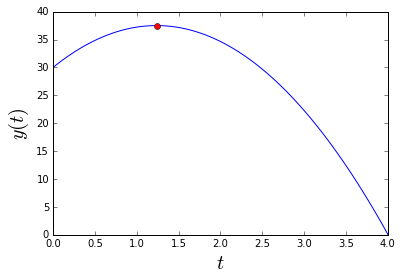

In [54]:
def y(t, v0, y0):
    return -0.5*9.8*t**2.0 + v0*t + y0

a = 0
b = 4
y0 = 30
v0 = 12.12
tt = np.linspace(a, b, 100)
yy = y(tt, v0, y0)

plt.plot(tt, yy)
plt.plot(1.236, 37.5, "ro")
plt.xlabel("$t$", fontsize=20)
plt.ylabel("$y(t)$", fontsize=20)
plt.show()

## Shooting method

In [56]:
# Interval
import numpy as np
from scipy.integrate import odeint

a = 0
b = 1
yb = 3.0
t = np.linspace(a, b, 101)

### u' = v
### v' = 4u

def yprime(_y, t):
    v, u = _y
    return [4*u, v]

def F(s):
    y0 = [s, 1]
    sol = odeint(yprime, y0, t)
    return sol[:,1][-1] - yb

F(0)
F(-1)

#plt.plot(t, sol[:, 0], 'b', label='theta(t)')

-1.0512344570560439